In [26]:
# dataset from https://www.kaggle.com/datasets/javi2270784/gas-sensor-array-temperature-modulation/data
# references from  [1] and [2]
# [1] Burgués, Javier, Juan Manuel Jiménez-Soto, and Santiago Marco. "Estimation of the limit of detection in semiconductor gas sensors through linearized calibration models." Analytica chimica acta 1013 (2018): 13-25.
# [2] Burgués, Javier, and Santiago Marco. "Multivariate estimation of the limit of detection by orthogonal partial least squares in temperature-modulated MOX sensors." Analytica chimica acta 1019 (2018): 49-64.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import json_normalize
import lightgbm as lgbm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, StratifiedKFold
from tqdm.notebook import tqdm

In [28]:
# ../input/gas-sensor-array-temperature-modulation/20160930_203718.csvを読み込む
df_20160930_203718 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20160930_203718.csv')
print(df_20160930_203718.shape)
# ../input/gas-sensor-array-temperature-modulation/20161001_231809.csvを読み込む
df_20161001_231809 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161001_231809.csv')
print(df_20161001_231809.shape)
# ../input/gas-sensor-array-temperature-modulation/20161003_085624.csvを読み込む
df_20161003_085624 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161003_085624.csv')
print(df_20161003_085624.shape)
# ../input/gas-sensor-array-temperature-modulation/20161004_104124.csvを読み込む
df_20161004_104124 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161004_104124.csv')
print(df_20161004_104124.shape)
# ../input/gas-sensor-array-temperature-modulation/20161005_140846.csvを読み込む
df_20161005_140846 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161005_140846.csv')
print(df_20161005_140846.shape)
# ../input/gas-sensor-array-temperature-modulation/20161006_182224.csvを読み込む
df_20161006_182224 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161006_182224.csv')
print(df_20161006_182224.shape)
# ../input/gas-sensor-array-temperature-modulation/20161007_210049.csvを読み込む
df_20161007_210049 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161007_210049.csv')
print(df_20161007_210049.shape)
# ../input/gas-sensor-array-temperature-modulation/20161008_234508.csvを読み込む
df_20161008_234508 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161008_234508.csv')
print(df_20161008_234508.shape)
# ../input/gas-sensor-array-temperature-modulation/20161010_095046.csvを読み込む
df_20161010_095046 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161010_095046.csv')
print(df_20161010_095046.shape)
# ../input/gas-sensor-array-temperature-modulation/20161011_113032.csvを読み込む
df_20161011_113032 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161011_113032.csv')
print(df_20161011_113032.shape)
# ../input/gas-sensor-array-temperature-modulation/20161013_143355.csvを読み込む
df_20161013_143355 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161013_143355.csv')
print(df_20161013_143355.shape)
# ../input/gas-sensor-array-temperature-modulation/20161014_184659.csvを読み込む
df_20161014_184659 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161014_184659.csv')
print(df_20161014_184659.shape)
# ../input/gas-sensor-array-temperature-modulation/20161016_053656.csvを読み込む
df_20161016_053656 = pd.read_csv('../input/gas-sensor-array-temperature-modulation/20161016_053656.csv')
print(df_20161016_053656.shape)

(295719, 20)
(295516, 20)
(295700, 20)
(295653, 20)
(295534, 20)
(295499, 20)
(295700, 20)
(295524, 20)
(295747, 20)
(295391, 20)
(295679, 20)
(295881, 20)
(295617, 20)


In [29]:
# trainデータとして、df_20160930_203718~df_df_20161014_184659を結合
train = pd.concat([df_20160930_203718, df_20161001_231809, df_20161003_085624, df_20161004_104124, df_20161005_140846, df_20161006_182224, df_20161007_210049, df_20161008_234508, df_20161010_095046, df_20161011_113032, df_20161013_143355, df_20161014_184659])

In [30]:
# validationデータとして20161016_053656を使用
valid = df_20161016_053656

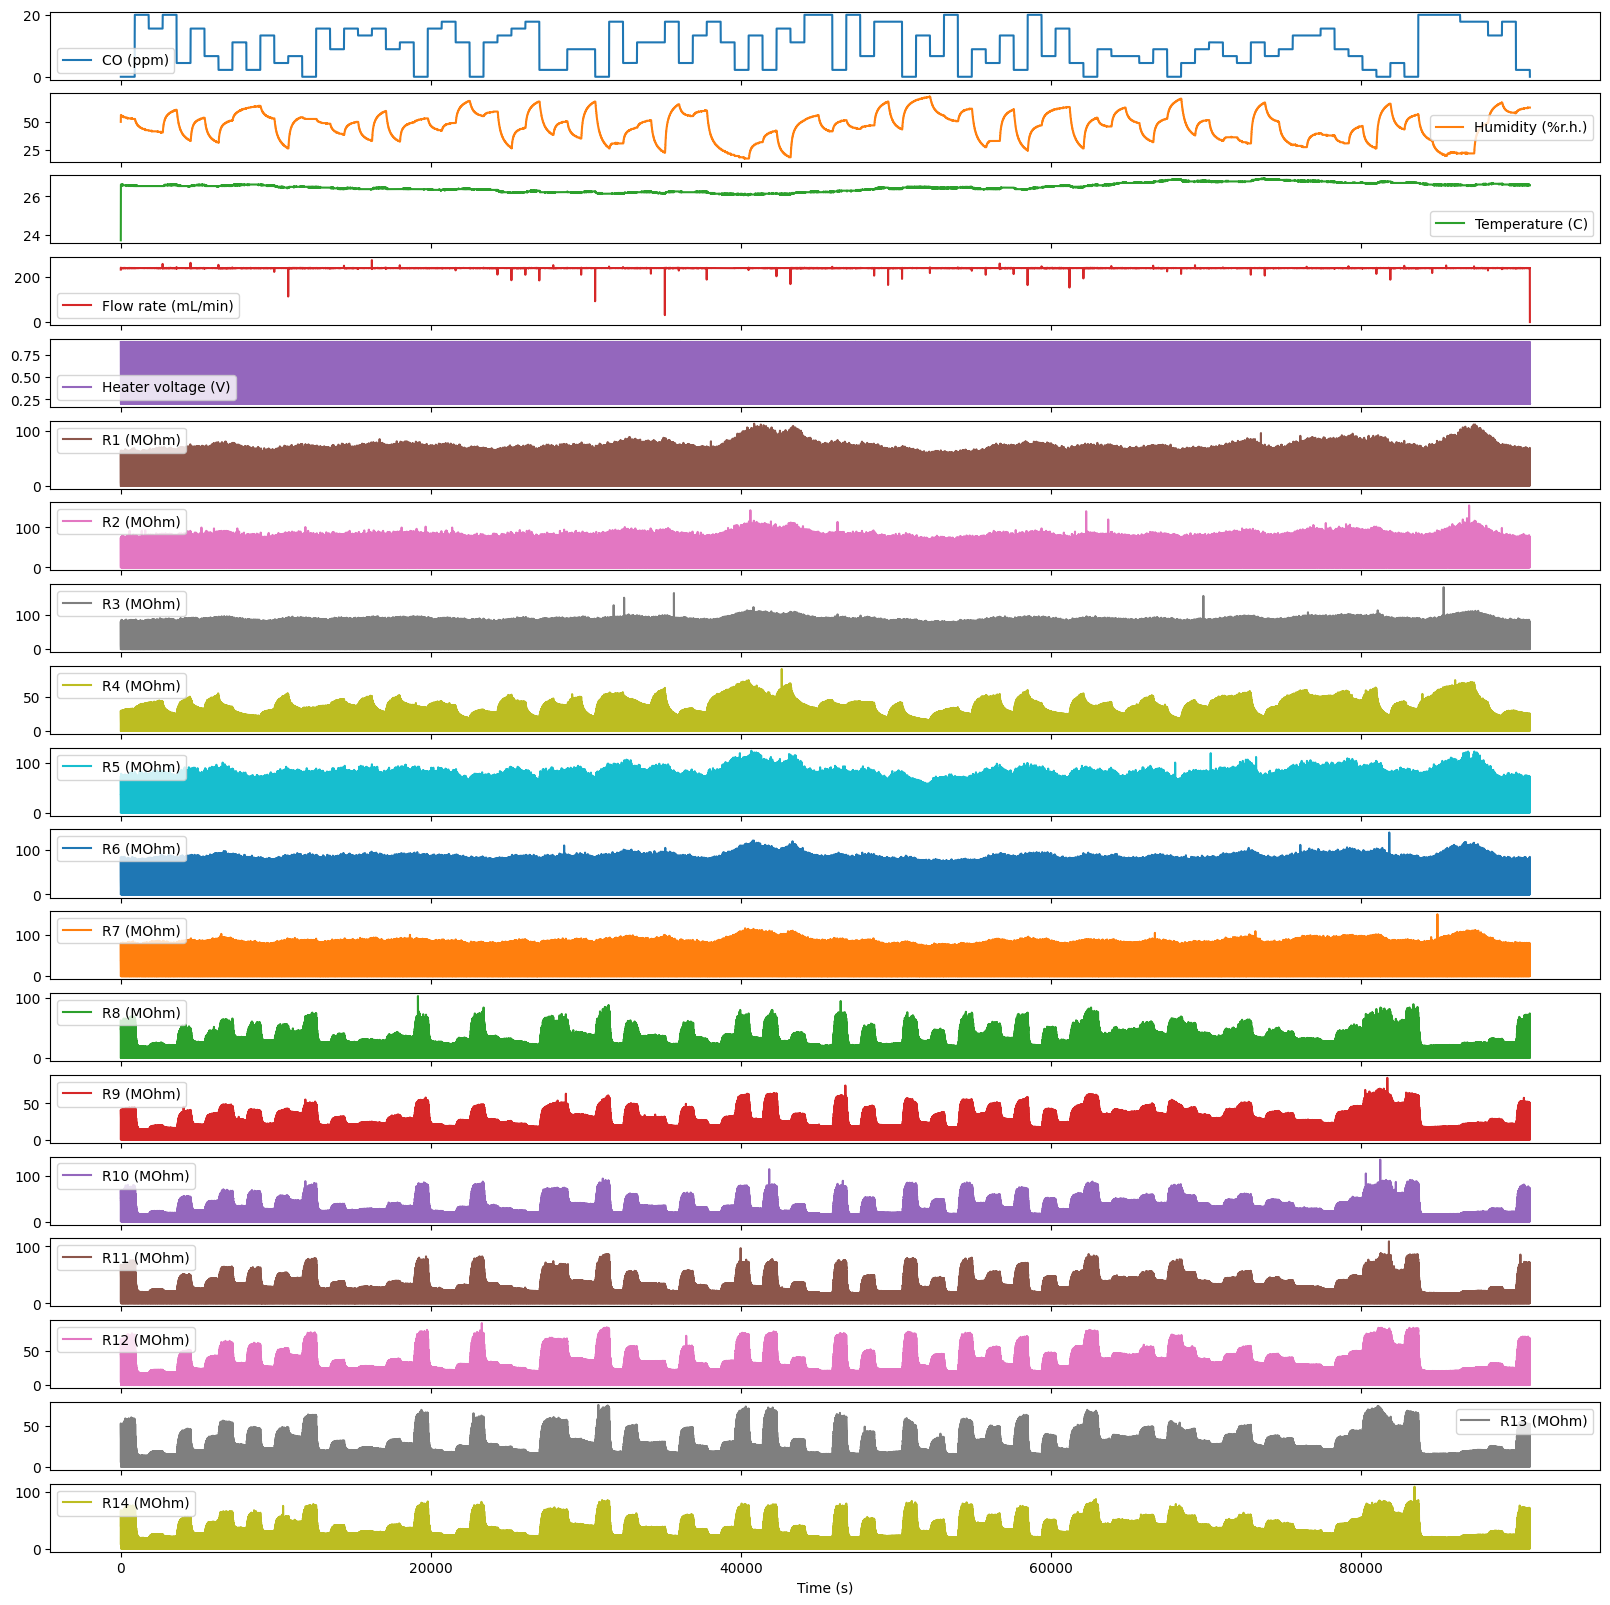

In [31]:
# df_20160930_203718のTime (s)を横軸に、縦軸にそれ以外の列を取り、グラフを描画
df_20160930_203718.plot(x='Time (s)', subplots=True, figsize=(20, 20))
plt.show()

In [32]:
# X_train, y_train, X_valid, y_validを作成
X_train = train.drop(columns=['Time (s)', 'CO (ppm)'])
y_train = train['CO (ppm)']
X_valid = valid.drop(columns=['Time (s)', 'CO (ppm)'])
y_valid = valid['CO (ppm)']

In [33]:
params = {
    "objective": "regression",
    "learning_rate": 0.01,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "random_state":42,
    "max_depth": 5,
    "n_estimators": 10000, # "n_estimators": 1000ではearly_stopping(stopping_rounds=10)で収束しない
    "colsample_bytree": 0.7,
}
model = lgbm.LGBMRegressor(**params)
model.fit(
          X_train, y_train,
          eval_set = [(X_valid, y_valid)],
          eval_metric = "rmse",
          callbacks=[lgbm.early_stopping(stopping_rounds=10)]
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4505
[LightGBM] [Info] Number of data points in the train set: 3547543, number of used features: 18
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 9.900698
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with p

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=5,
              n_estimators=10000, objective='regression', random_state=42,
              reg_alpha=0.1, reg_lambda=0.1)

In [34]:
# vallidの予測値を求める
valid_preds = model.predict(X_valid, num_iteration=model.best_iteration_)
# validの予測値と正解値でRMSEとMAEを求める
rmse = np.sqrt(mean_squared_error(y_valid, valid_preds))
mae = mean_absolute_error(y_valid, valid_preds)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSE: 2.1415874500510155
MAE: 1.2257499607309452


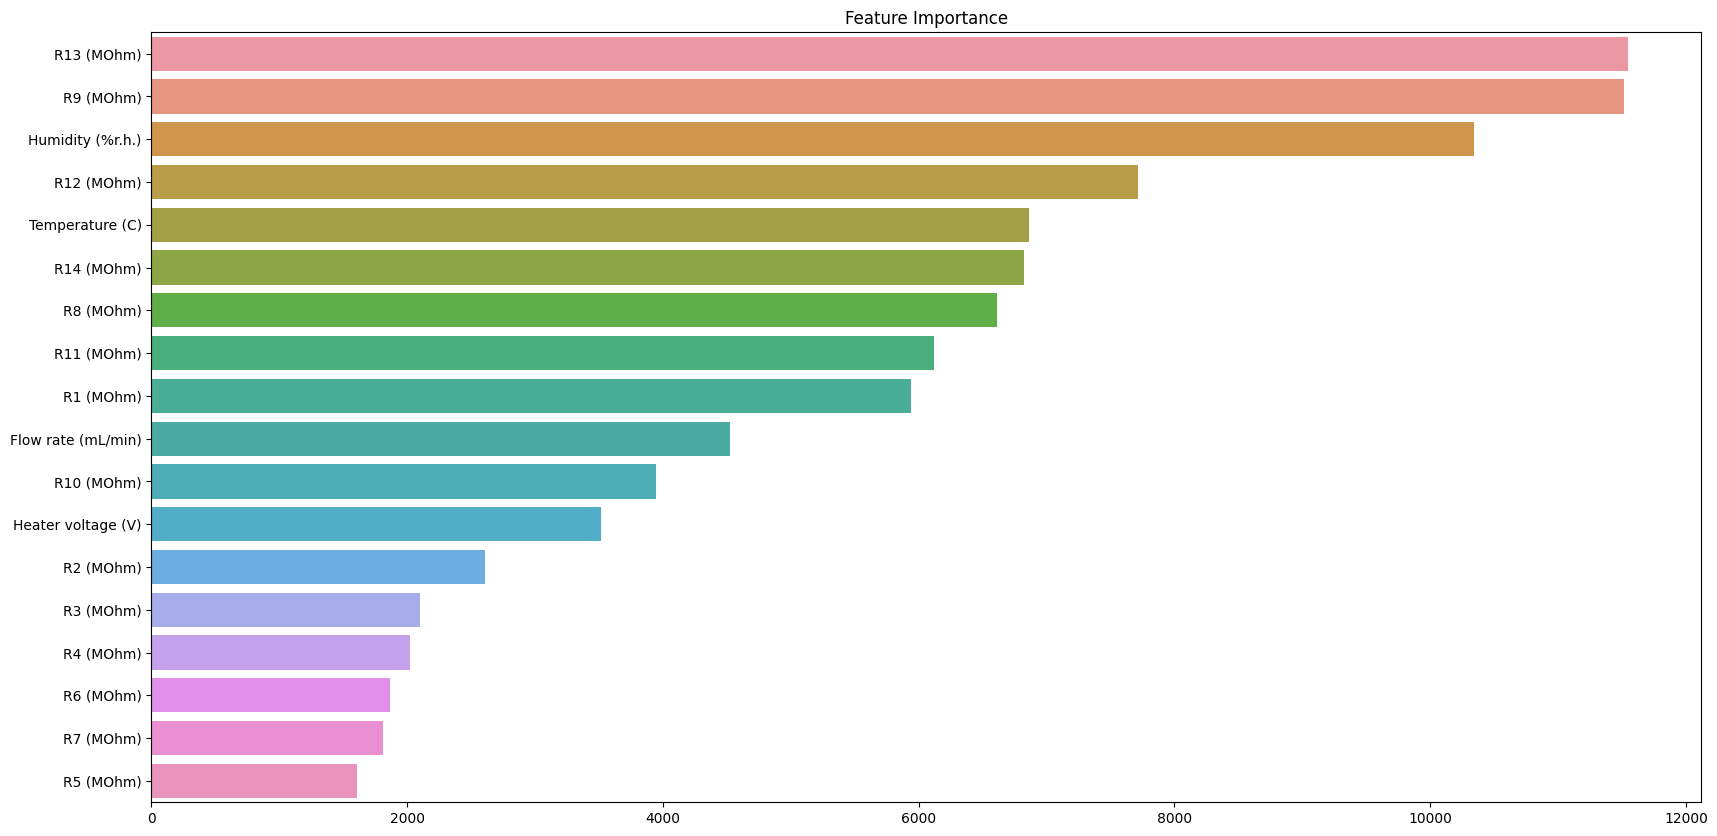

In [35]:
# modelのfeature_importances_を取得
feature_importance = model.feature_importances_
# feature_importanceを大きい順に並び替え
indices = np.argsort(feature_importance)[::-1]
# feature_importanceを可視化
plt.figure(figsize=(20, 10))
plt.title("Feature Importance")
sns.barplot(x=feature_importance[indices], y=X_train.columns[indices])
plt.show()

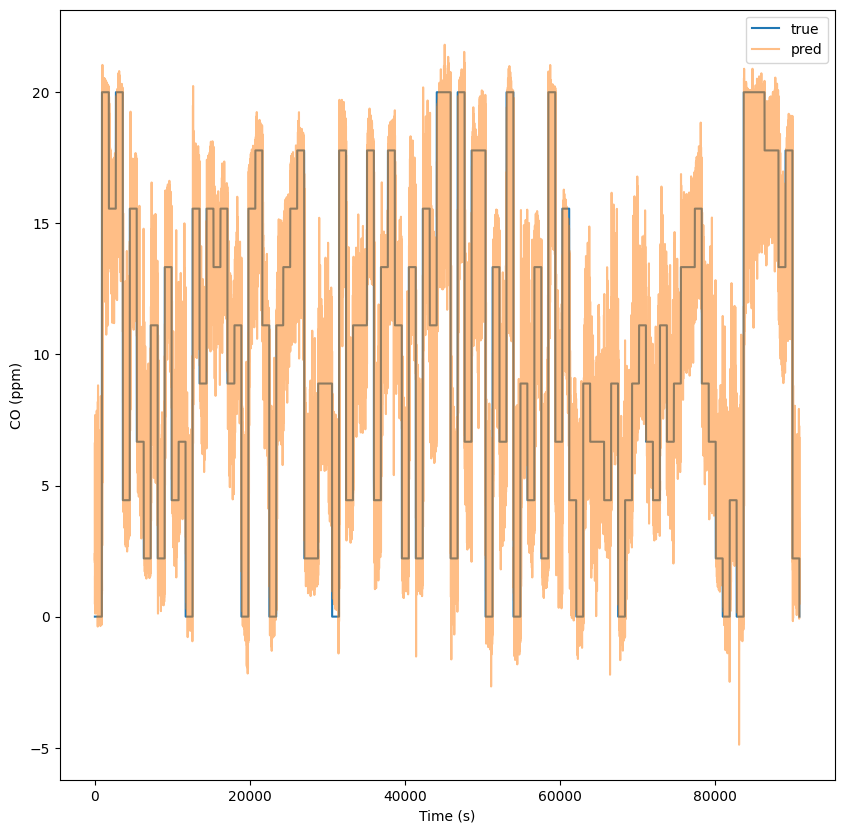

In [36]:
# y_valid, valid_predsを縦軸、横軸にTime (s)を取り、グラフを描画
plt.figure(figsize=(10, 10))
plt.plot(valid['Time (s)'], y_valid, label='true')
plt.plot(valid['Time (s)'], valid_preds, label='pred', alpha=0.5)
# 縦軸、横軸にラベルを付ける
plt.xlabel('Time (s)')
plt.ylabel('CO (ppm)')
plt.legend()

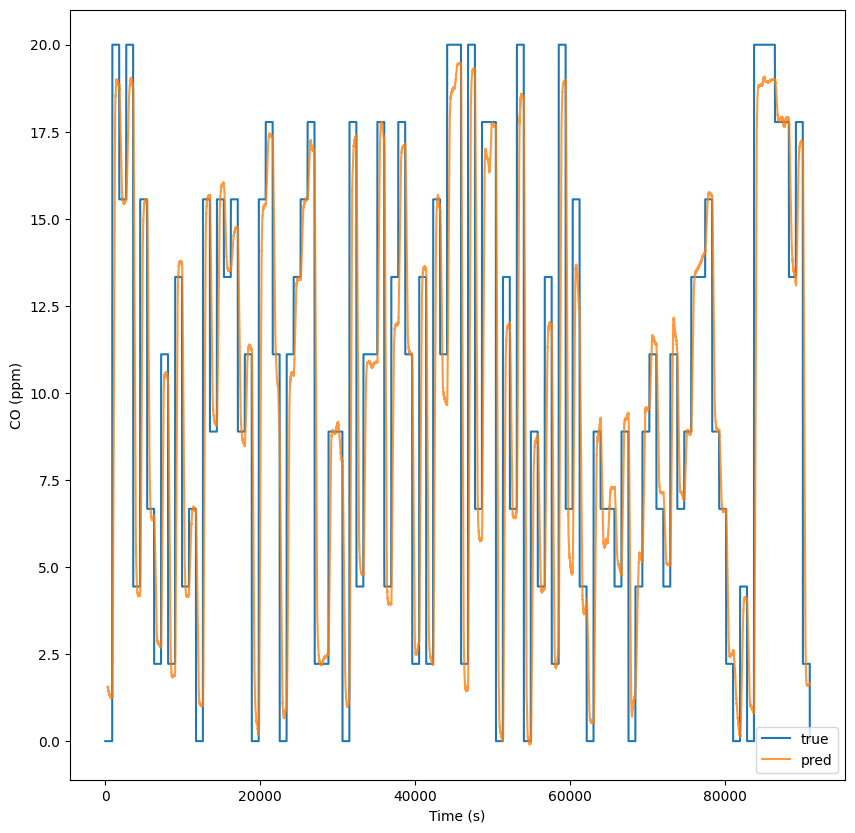

In [37]:
# predを移動平均で平滑化
pred = pd.Series(valid_preds)
pred_smooth = pred.rolling(window=1000).mean()
# y_valid, pred_smoothを縦軸、横軸にTime (s)を取り、グラフを描画
plt.figure(figsize=(10, 10))
plt.plot(valid['Time (s)'], y_valid, label='true')
plt.plot(valid['Time (s)'], pred_smooth, label='pred', alpha=0.8)
# 縦軸、横軸にラベルを付ける
plt.xlabel('Time (s)')
plt.ylabel('CO (ppm)')
plt.legend()

In [38]:
# ラグ特徴量を作成
def create_lag_features(df, window):
    df_shifted = df.shift(window)
    df_shifted.columns = [f"{col}_lag{window}" for col in df.columns]
    return df_shifted

# train, validに対してラグ特徴量を作成
train_lag = create_lag_features(train.drop(columns=['Time (s)', 'CO (ppm)']), 1)
valid_lag = create_lag_features(valid.drop(columns=['Time (s)', 'CO (ppm)']), 1)

In [39]:
train_lag

,Humidity (%r.h.)_lag1,Temperature (C)_lag1,Flow rate (mL/min)_lag1,Heater voltage (V)_lag1,R1 (MOhm)_lag1,R2 (MOhm)_lag1,R3 (MOhm)_lag1,R4 (MOhm)_lag1,R5 (MOhm)_lag1,R6 (MOhm)_lag1,R7 (MOhm)_lag1,R8 (MOhm)_lag1,R9 (MOhm)_lag1,R10 (MOhm)_lag1,R11 (MOhm)_lag1,R12 (MOhm)_lag1,R13 (MOhm)_lag1,R14 (MOhm)_lag1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
2,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
3,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
4,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295876,62.0600,25.1000,0.0000,0.8982,0.0965,0.1531,0.1312,0.1103,0.0581,0.0730,0.1131,0.1119,0.1001,0.1238,0.1113,0.0623,0.1110,0.1200
295877,62.0600,25.1000,0.0000,0.8981,0.2018,0.5607,0.8668,0.6331,0.9859,1.1367,1.6256,1.0065,1.0946,1.4849,2.6780,4.4780,6.0728,7.6403
295878,62.0600,25.1000,0.0000,0.2119,2.1497,5.1727,7.9969,5.4928,7.9933,8.9320,11.9270,23.7481,21.1688,23.8594,33.2957,38.4578,37.0376,45.7715
295879,62.0600,25.1000,0.0000,0.2077,11.7504,23.8667,33.7225,19.7813,31.1327,33.3141,41.1262,66.6625,55.6241,60.1967,60.7607,64.0377,58.9429,71.7899


In [40]:
valid_lag

,Humidity (%r.h.)_lag1,Temperature (C)_lag1,Flow rate (mL/min)_lag1,Heater voltage (V)_lag1,R1 (MOhm)_lag1,R2 (MOhm)_lag1,R3 (MOhm)_lag1,R4 (MOhm)_lag1,R5 (MOhm)_lag1,R6 (MOhm)_lag1,R7 (MOhm)_lag1,R8 (MOhm)_lag1,R9 (MOhm)_lag1,R10 (MOhm)_lag1,R11 (MOhm)_lag1,R12 (MOhm)_lag1,R13 (MOhm)_lag1,R14 (MOhm)_lag1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48.47,24.62,247.4926,0.2000,0.6831,0.6992,1.1940,16.0255,23.0855,11.2872,19.5953,53.0355,47.0753,55.1962,63.9090,51.8182,49.4775,63.3641
2,48.47,24.62,243.8282,0.1998,0.6649,0.6976,1.1514,15.2863,22.4605,10.3764,18.5686,53.0355,48.4789,52.8143,62.4980,50.3466,49.7900,63.3641
3,48.47,24.62,243.0668,0.2000,0.6481,0.6863,1.1133,14.3923,20.8138,9.8742,17.7525,43.7627,47.3693,55.5168,57.9038,51.5393,50.0533,65.8253
4,48.47,24.62,242.3030,0.2000,0.6318,0.6757,1.0795,14.0074,19.5772,9.3127,16.6801,53.0355,46.8330,51.5578,63.9090,52.4422,49.2201,62.4461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295612,63.94,24.62,0.0000,0.2130,1.7089,4.2170,6.4014,4.3145,6.1736,6.9606,9.4870,17.8889,16.0915,18.8656,26.1827,31.7568,32.8770,41.1046
295613,63.94,24.62,0.0000,0.2080,9.9322,19.1578,30.1225,17.4705,28.2241,29.2848,35.2025,54.4724,51.7813,59.3023,63.4039,61.3484,53.8044,65.2822
295614,63.94,24.62,0.0000,0.2050,31.7887,50.6638,62.3092,32.0334,54.3512,57.2118,64.5292,78.2372,63.7388,69.2228,68.3506,70.6909,62.4181,74.9537
295615,63.94,24.62,0.0000,0.2040,57.7304,76.9383,80.6932,38.9931,82.5354,74.2258,77.0531,53.0355,70.6869,75.8734,76.1033,71.3160,61.0589,73.6785


In [41]:
# train, validにラグ特徴量を結合
train = pd.concat([train, train_lag], axis=1)
valid = pd.concat([valid, valid_lag], axis=1)

# X_train, y_train, X_valid, y_validを作成
X_train = train.drop(columns=['Time (s)', 'CO (ppm)'])
y_train = train['CO (ppm)']
X_valid = valid.drop(columns=['Time (s)', 'CO (ppm)'])
y_valid = valid['CO (ppm)']

# modelを再度学習
model = lgbm.LGBMRegressor(**params)
model.fit(
          X_train, y_train,
          eval_set = [(X_valid, y_valid)],
          eval_metric = "rmse",
          callbacks=[lgbm.early_stopping(stopping_rounds=10)]
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.211388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9006
[LightGBM] [Info] Number of data points in the train set: 3547543, number of used features: 36
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 9.900698
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with p

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=5,
              n_estimators=10000, objective='regression', random_state=42,
              reg_alpha=0.1, reg_lambda=0.1)

In [42]:
# validの予測値を求める
valid_preds_with_lag = model.predict(X_valid, num_iteration=model.best_iteration_)
# validの予測値と正解値でRMSEとMAEを求める
rmse = np.sqrt(mean_squared_error(y_valid, valid_preds_with_lag))
mae = mean_absolute_error(y_valid, valid_preds_with_lag)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSE: 2.02868141189593
MAE: 1.1320590134722606


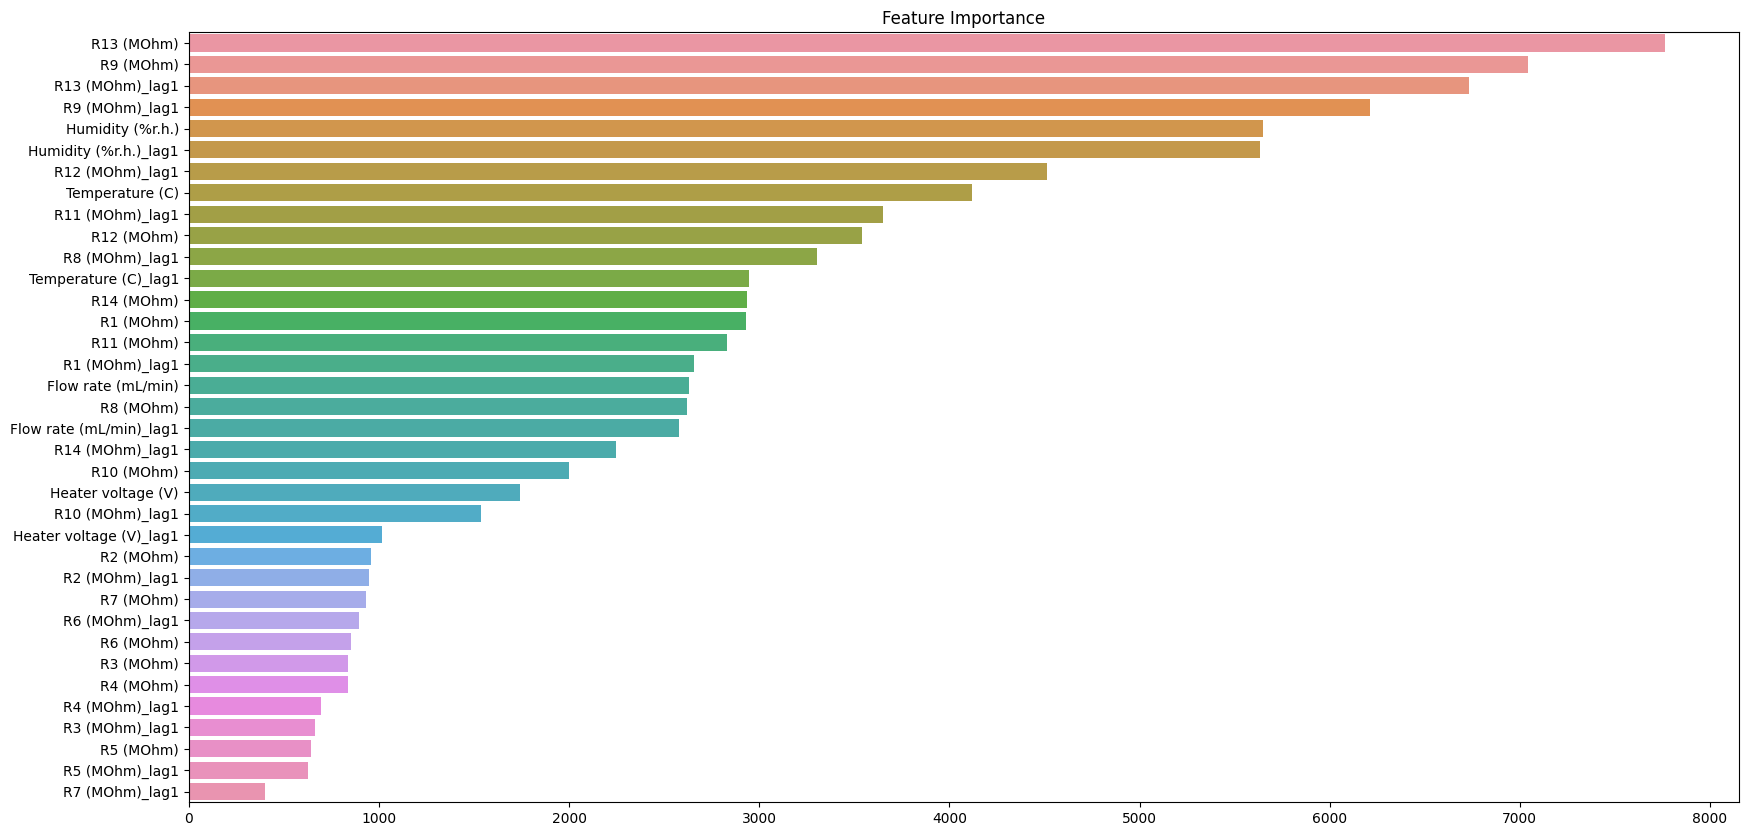

In [43]:
# modelのfeature_importances_を取得
feature_importance = model.feature_importances_
# feature_importanceを大きい順に並び替え
indices = np.argsort(feature_importance)[::-1]
# feature_importanceを可視化
plt.figure(figsize=(20, 10))
plt.title("Feature Importance")
sns.barplot(x=feature_importance[indices], y=X_train.columns[indices])
plt.show()

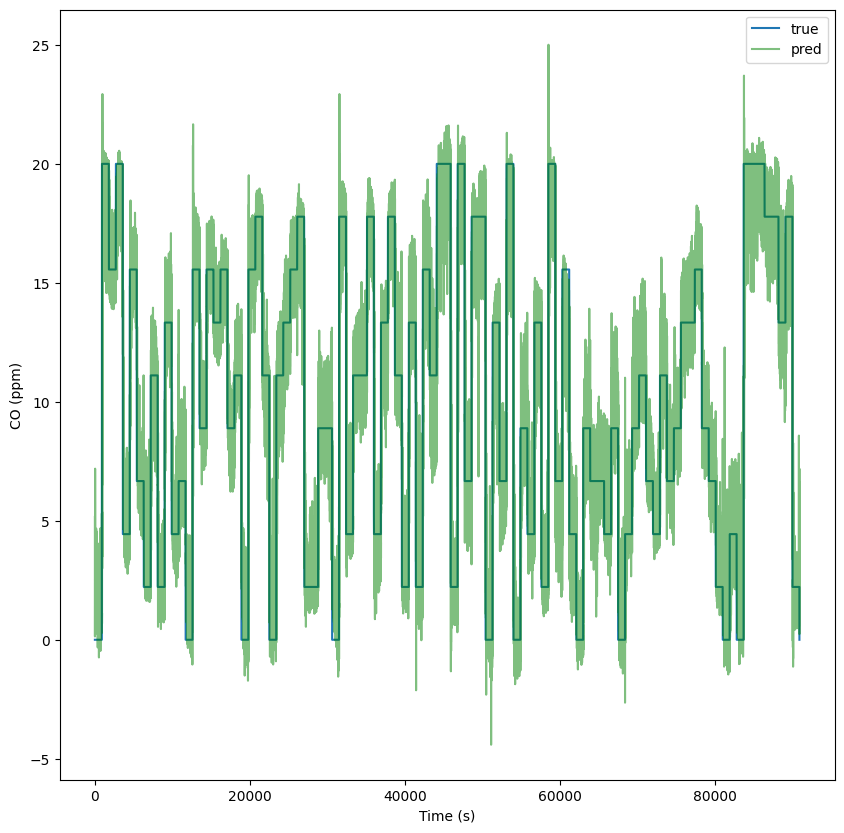

In [44]:
# y_valid, valid_preds_with_lagを縦軸、横軸にTime (s)を取り、グラフを描画
plt.figure(figsize=(10, 10))
plt.plot(valid['Time (s)'], y_valid, label='true')
plt.plot(valid['Time (s)'], valid_preds_with_lag, label='pred', alpha=0.5, color='green')
# 縦軸、横軸にラベルを付ける
plt.xlabel('Time (s)')
plt.ylabel('CO (ppm)')
plt.legend()

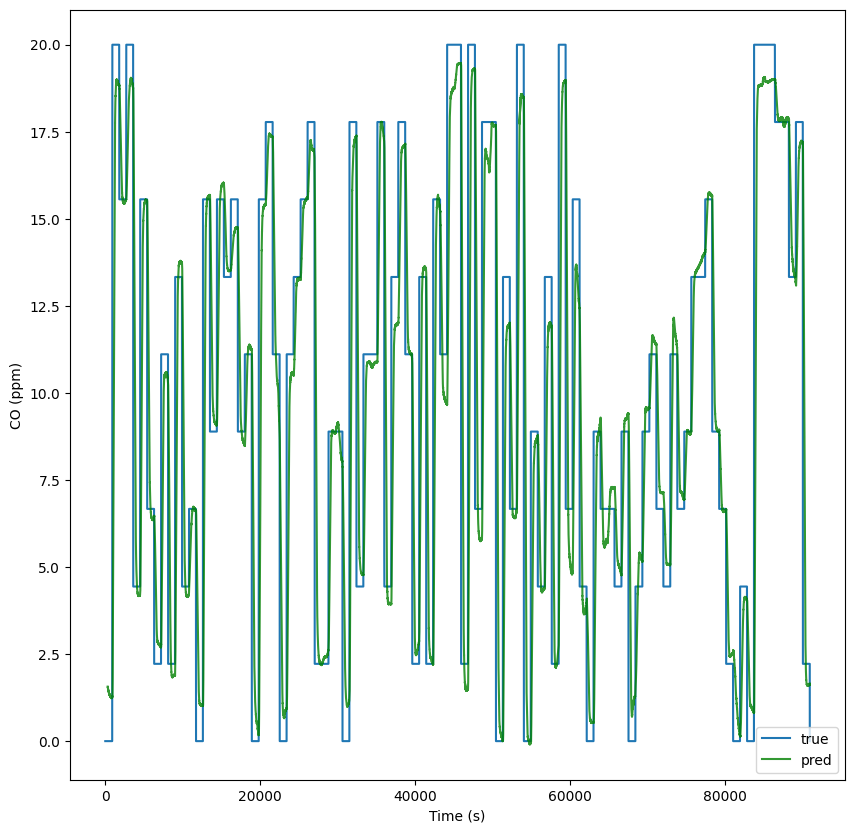

In [45]:
# predを移動平均で平滑化
pred_with_lag = pd.Series(valid_preds_with_lag)
pred_with_lag_smooth = pred_with_lag.rolling(window=1000).mean()
# y_valid, pred_smoothを縦軸、横軸にTime (s)を取り、グラフを描画
plt.figure(figsize=(10, 10))
plt.plot(valid['Time (s)'], y_valid, label='true')
plt.plot(valid['Time (s)'], pred_smooth, label='pred', alpha=0.8, color='green')
# 縦軸、横軸にラベルを付ける
plt.xlabel('Time (s)')
plt.ylabel('CO (ppm)')
plt.legend()

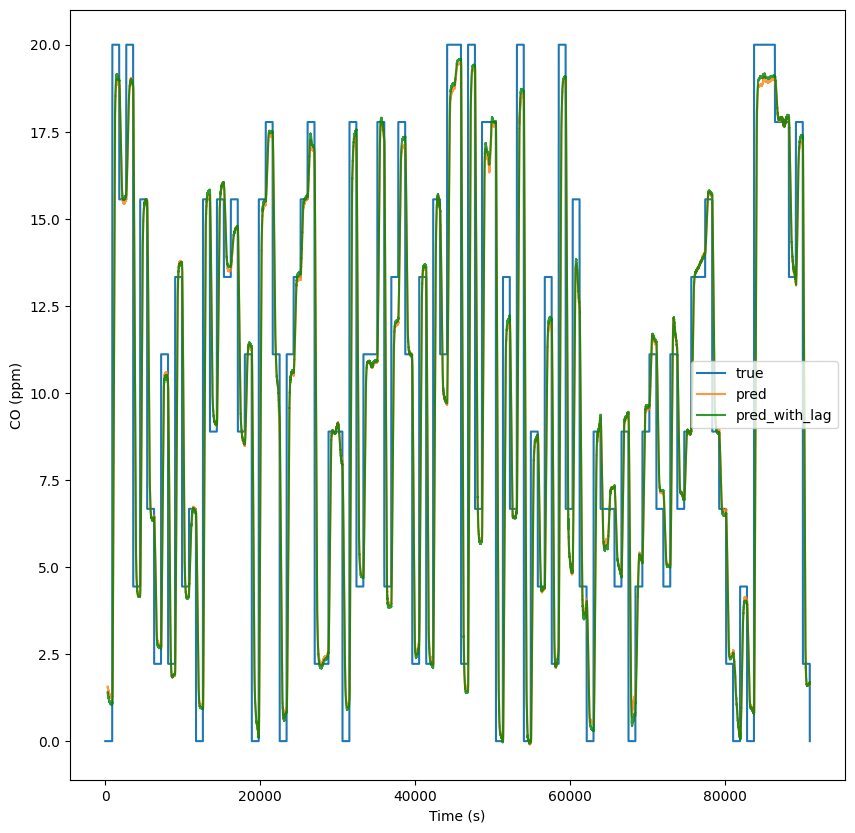

In [46]:
# y_valid, pred_smooth, pred_with_lag_smoothを縦軸、横軸にTime (s)を取り、グラフを描画
plt.figure(figsize=(10, 10))
plt.plot(valid['Time (s)'], y_valid, label='true')
plt.plot(valid['Time (s)'], pred_smooth, label='pred', alpha=0.8)
plt.plot(valid['Time (s)'], pred_with_lag_smooth, label='pred_with_lag', alpha=0.8, color='green')
# 縦軸、横軸にラベルを付ける
plt.xlabel('Time (s)')
plt.ylabel('CO (ppm)')
plt.legend()